In [3]:
from sklearn import cross_validation, datasets, linear_model, metrics
from matplotlib.colors import ListedColormap

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Create datasets

In [5]:
clf_data, clf_target = datasets.make_classification(n_features=2,
                                                   n_informative=2,
                                                   n_classes=2,
                                                   n_redundant=0,
                                                   n_clusters_per_class=1,
                                                   random_state=7)

In [6]:
reg_data, reg_target = datasets.make_regression(n_features=2,
                                               n_informative=1,
                                               n_targets=1,
                                               noise=5.0,
                                               random_state=7)

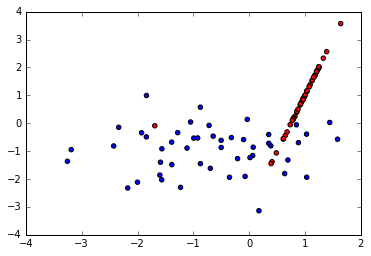

In [7]:
colors = ListedColormap(['red', 'blue'])
pylab.scatter(list(map(lambda x: x[0], clf_data)), list(map(lambda x: x[1], clf_data)), c=clf_target, cmap=colors)

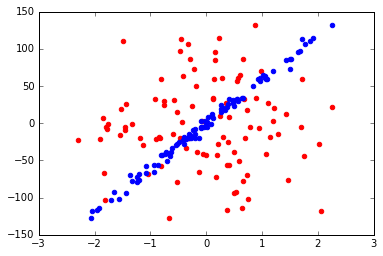

In [9]:
pylab.scatter(list(map(lambda x: x[0], reg_data)), reg_target, color='r')
pylab.scatter(list(map(lambda x: x[1], reg_data)), reg_target, color='b')

In [10]:
clf_train_data, clf_test_data, clf_train_labels, clf_test_labels = cross_validation.train_test_split(clf_data,
                                                                                    clf_target,
                                                                                    test_size=0.3,
                                                                                    random_state=1)

In [11]:
reg_train_data, reg_test_data, reg_train_labels, reg_test_labels = cross_validation.train_test_split(reg_data,
                                                                                    reg_target,
                                                                                    test_size=0.3,
                                                                                    random_state=1)

# Metrics

In [12]:
classifier = linear_model.SGDClassifier(loss='log', random_state=1)

In [13]:
classifier.fit(clf_train_data, clf_train_labels)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=1, shuffle=True, verbose=0,
       warm_start=False)

In [14]:
prediction = classifier.predict(clf_test_data)

In [15]:
probability_prediction = classifier.predict_proba(clf_test_data)

In [16]:
print(clf_test_labels)

[1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1]


In [17]:
print(prediction)

[1 1 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1]


In [18]:
print(probability_prediction)

[[  6.30860475e-10   9.99999999e-01]
 [  1.30796176e-01   8.69203824e-01]
 [  9.99999957e-01   4.29396567e-08]
 [  9.99999998e-01   2.03589255e-09]
 [  6.79456491e-14   1.00000000e+00]
 [  9.92480510e-01   7.51949005e-03]
 [  6.27129282e-09   9.99999994e-01]
 [  9.99768437e-01   2.31563146e-04]
 [  4.23363514e-06   9.99995766e-01]
 [  9.99999996e-01   4.37306262e-09]
 [  9.99998580e-01   1.42012419e-06]
 [  2.50774068e-10   1.00000000e+00]
 [  0.00000000e+00   1.00000000e+00]
 [  9.53516424e-01   4.64835761e-02]
 [  1.59664574e-04   9.99840335e-01]
 [  9.99999454e-01   5.45774089e-07]
 [  9.99970005e-01   2.99945879e-05]
 [  9.99999998e-01   1.51081346e-09]
 [  3.33030463e-01   6.66969537e-01]
 [  1.94570871e-07   9.99999805e-01]
 [  9.99999983e-01   1.65319259e-08]
 [  6.39962591e-01   3.60037409e-01]
 [  6.09980329e-03   9.93900197e-01]
 [  4.81872556e-04   9.99518127e-01]
 [  1.67943095e-05   9.99983206e-01]
 [  9.99999187e-01   8.13104059e-07]
 [  1.00000000e+00   1.55422213e-11]
 

# accuracy

In [20]:
# simple accuracy metric
sum([1.0 if pair[0] == pair[1] else 0.0 for pair in zip(clf_test_labels, prediction)])/len(clf_test_labels)

0.83333333333333337

In [21]:
metrics.accuracy_score(clf_test_labels, prediction)

0.83333333333333337

# confusion matrix

In [22]:
matrix = metrics.confusion_matrix(clf_test_labels, prediction)
print(matrix)

[[12  2]
 [ 3 13]]


In [25]:
# simple confusion matrix
sum([1 if pair[0] == pair[1] else 0 for pair in zip(clf_test_labels, prediction)])

25

In [24]:
matrix.diagonal().sum()

25

# presicion

In [26]:
metrics.precision_score(clf_test_labels, prediction, pos_label=0)

0.80000000000000004

In [27]:
metrics.precision_score(clf_test_labels, prediction)

0.8666666666666667

# recall

In [28]:
metrics.recall_score(clf_test_labels, prediction, pos_label=0)

0.8571428571428571

In [29]:
metrics.recall_score(clf_test_labels, prediction)

0.8125

# f1

In [30]:
metrics.f1_score(clf_test_labels, prediction, pos_label=0)

0.82758620689655182

In [31]:
metrics.f1_score(clf_test_labels, prediction)

0.83870967741935487

# classification report

In [33]:
print(metrics.classification_report(clf_test_labels, prediction))

             precision    recall  f1-score   support

          0       0.80      0.86      0.83        14
          1       0.87      0.81      0.84        16

avg / total       0.84      0.83      0.83        30



# ROC curve

In [34]:
fpr, tpr, _ = metrics.roc_curve(clf_test_labels, probability_prediction[:, 1])

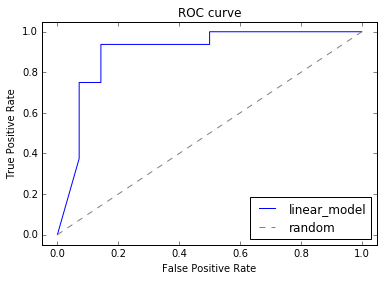

In [38]:
pylab.plot(fpr, tpr, label='linear_model')
pylab.plot([0, 1], [0, 1], '--', color='grey', label='random')
pylab.xlim([-0.05, 1.05])
pylab.ylim([-0.05, 1.05])
pylab.xlabel('False Positive Rate')
pylab.ylabel('True Positive Rate')
pylab.title('ROC curve')
pylab.legend(loc='lower right')

# ROC AUC

In [36]:
metrics.roc_auc_score(clf_test_labels, prediction)

0.8348214285714286

In [37]:
metrics.roc_auc_score(clf_test_labels, probability_prediction[:, 1])

0.9017857142857143

# PR AUC

In [39]:
metrics.roc_auc_score(clf_test_labels, prediction)

0.8348214285714286

# log loss

In [42]:
metrics.log_loss(clf_test_labels, probability_prediction[:, 1])

1.3284088910578731

# Regression

In [47]:
regressor = linear_model.SGDRegressor(random_state=1, n_iter=20)
regressor.fit(reg_train_data, reg_train_labels)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=20, penalty='l2', power_t=0.25,
       random_state=1, shuffle=True, verbose=0, warm_start=False)

In [48]:
reg_predictions = regressor.predict(reg_test_data)

In [49]:
print(reg_test_labels)

[   2.67799047    7.06525927  -56.43389936   10.08001896  -22.46817716
  -19.27471232   59.44372825  -21.60494574   32.54682713  -41.89798772
  -18.16390935   32.75688783   31.04095773    2.39589626   -5.04783924
  -70.20925097   86.69034305   18.50402992   32.31573461 -101.81138022
   15.14628858   29.49813932   97.282674     25.88034991  -41.63332253
  -92.11198201   86.7177122     2.13250832  -20.24967575  -27.32511755]


In [50]:
print(reg_predictions)

[ -1.46503565   5.75776789 -50.13234306   5.05646094 -24.09370893
  -8.34831546  61.77254998 -21.98350565  30.65112022 -39.25972497
 -17.19337022  30.94178225  26.98820076  -6.08321732  -3.46551    -78.9843398
  84.80190097  14.80638314  22.91302375 -89.63572717  14.5954632
  31.64431951  95.81031534  21.5037679  -43.1101736  -95.06972123
  86.70086546   0.47837761 -16.44594704 -22.72581879]


# mean absolute error

In [51]:
metrics.mean_absolute_error(reg_test_labels, reg_predictions)

3.748761311885298

# mean squared error

In [52]:
metrics.mean_squared_error(reg_test_labels, reg_predictions)

24.114925597460914

# root mean error

In [53]:
sqrt(metrics.mean_squared_error(reg_test_labels, reg_predictions))

4.9106950218335603

# r2 score

In [54]:
metrics.r2_score(reg_test_labels, reg_predictions)

0.98931761505469495